So far, I have discussed some of the theory behind machine learning algorithms and shown you how to perform vital steps when it comes to data preprocessing such as feature scaling and feature encoding. We are now ready to start with the simplest machine learning algorithm which is simple linear regression (SLR).

Remember, back in school, you would collect data for one of your science lab experiments and then use it to predict some values by plotting your data in Microsoft Excel and then drawing a line of best fit through your data? That line of best fit is an outcome of SLR model. An SLR model is a linear model which assumes that two variables (independent and dependent variables) exhibit linear relationship. A linear model with multiple independent variables is called multiple linear regression model.

## How does the model work?

Since SLR model exhibits a linear relationship, we know the line of best fit is described by a linear equation of the form: y = mx + b where y is the dependent variable, x is the independent variable, m is the slope and b is the y-intercept. Alternatively, m and b are also known as betas. The key to finding a good SLR model is to find the values for these betas that get you the most accurate predictions.

SLR model uses a technique called Ordinary Least Squares (OLS) to find the optimum value for the betas. OLS consists of calculating the error which is the difference between predicted value and actual value and then taking square of it. The goal is to find the betas that minimize the sum of the squared errors.

If you want to learn more about SLM and OLS, I highly recommend this visual explanation.


## How can I implement SLR model?

It's amazing how easy it is to implement SLR model (and other models) in scikit-learn. We will begin with looking at some dummy data I created about temperature (in Fahrenheit) and soda sales. We will use this dataset to train our SLR model and then test it out to see how accurately it can predict values.

Here are the steps we are going to follow:

- Exploring the dataset
- Preprocessing the dataset
- Splitting the dataset into training and testing set
- Building the model
- Evaluating the model

## Exploring the dataset

In [12]:
# Let's load the data into python and take a look at it
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

dataset = pd.read_csv(r'soda_sales.csv')

dataset.head()

,temperature,units_sold
0,50,112
1,51,115
2,52,120
3,53,117
4,54,115


In [14]:
# Let's get some more information about our dataset
dataset.describe()

,temperature,units_sold
count,20.000000,20.000000
mean,64.050000,135.300000
std,9.405905,16.670491
min,50.000000,112.000000
25%,55.500000,122.250000
50%,63.500000,130.000000
75%,73.250000,153.250000
max,78.000000,160.000000


We can see there are 20 rows and 2 columns in our table. The mean of temperature and units_sold is 64.05 F and 135.3 units respectively.

Before we can work on implementing SLR model, we need to visualize the dataset and decide whether it is safe to assume that the data exhibits visual linear relationship. There is no point using an SLR model if the dataset is nonlinear. 

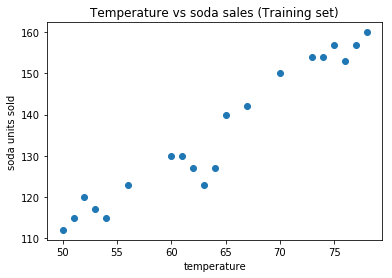

In [38]:
# Scatter plot
plt.scatter(dataset.temperature, dataset.units_sold);
plt.title('Temperature vs soda sales (Training set)');
plt.xlabel('temperature');
plt.ylabel('soda units sold');

As you can see, our data is quite linear so it's safe to go ahead and implement SLR model. 

## Preprocessing the dataset
Preprocessing the dataset is necessary most of the times but since this is dummy data that I created, we don't need to change anything. There is no missing data so we don't need to fill any values. Since, we are implementing SLR model, we don't need to perform feature scaling. And, because we are not dealing with any categorical data, we don't need to worry about feature encoding.

Only thing we need to do is split the dataset into dependent variable and independent variable so that we can feed it to our machine learning model. 

Keep in mind, that life is never this easy and data preprocessing is a very crucial step in the machine learning process and often the most time consuming. 

In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## Splitting the dataset into training and testing set
SLR model is a supervised learning model (see my earlier post on supervised and unsupervised models) which means we need to feed it some data first to train it. And, once it is trained, we need to test it on a different set of data. To do this, we need to split our dataset into training and testing set. Rule of thumb is to assign 80% of the dataset to training and 20% to testing. 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

At this point, we have four different arrays:
- X_train - independent variable (training set)
- X_test - independent variable (testing set)
- y_train - dependent variable (training set)
- y_test - dependent variable (testing set)

We will use X_train and y_train to train our SLR model and then feed SLR model with X_test to get our predictions. We will compare these predictions that our model gave us with the actual data, y_test. By comparing these two datasets, we can evaluate our model's performance.

## Building the model

In [33]:
# Training our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting values using our trained model
y_pred = regressor.predict(X_test)

We now have our predicted values, y_pred, and our actual values, y_test. We can compare these values to see how well our model performed through visualization.

## Evaluating the model

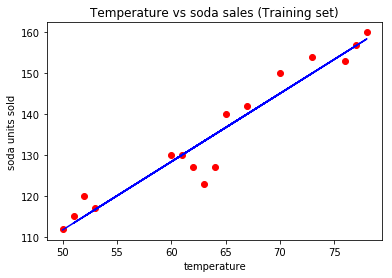

In [34]:
# Let's plot our model (line of best fit) aginst the training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Temperature vs soda sales (Training set)')
plt.xlabel('temperature')
plt.ylabel('soda units sold')
plt.show()

As we can see, our line of best fit is able to cover most of our original data. Of course, there are some outliers here and there. We don't want our line of best fit to cover every single point because that would be overfitting!

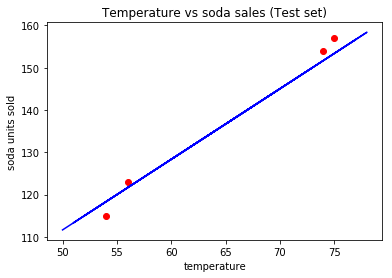

In [35]:
# Let's now see how well the model does against our test data.
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Temperature vs soda sales (Test set)')
plt.xlabel('temperature')
plt.ylabel('soda units sold')
plt.show()

Our model seems to work well for our test dataset as well! Of course, there are only four data points but feel free to run this model against a different dataset with more data. 

Visualizing our predictions and actual results is good for quick comparison but when working with big datasets, you would want to quantify how well your model performed. There are several statistical measures to do that such as explained variance score, mean absolute error, mean squared error and r-squared score.

We are not going to dive deeper into ways to evaluate models in this post.

In [39]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
ex_var_score = explained_variance_score(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
m_squared_error = mean_squared_error(y_test, y_pred)
r_2_score = r2_score(y_test, y_pred)

print("Explained Variance Score: "+str(ex_var_score))
print("Mean Absolute Error "+str(m_absolute_error))
print("Mean Squared Error "+str(m_squared_error))
print("R Squared Error "+str(r_2_score))


Explained Variance Score: 0.979896900554
Mean Absolute Error 2.64709145283
Mean Squared Error 7.8350986375
R Squared Error 0.977102908091


I will cover these metrics in detail in a different post. 

Hope you liked this post and et me know your thoughts and your suggestions!